In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas_datareader.data as web
from datetime import datetime


In [2]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [3]:
end=datetime.now()

In [4]:
start= datetime(end.year-1,end.month,end.day)

In [5]:
for stock in tech_list:
    globals()[stock]=web.DataReader(stock,'yahoo',start,end)

In [6]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-13,174.897995,171.899994,174.139999,172.858505,51380000.0,172.858505
2021-09-14,174.340500,171.885498,173.777496,172.500000,38738000.0,172.500000
2021-09-15,174.270996,170.100494,172.126007,173.789505,59150000.0,173.789505
2021-09-16,174.627502,172.307007,172.998001,174.412003,51672000.0,174.412003
2021-09-17,174.870499,172.606506,174.420502,173.126007,92332000.0,173.126007


In [7]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-07,129.820007,125.400002,126.120003,129.479996,47900300.0,129.479996
2022-09-08,130.279999,127.099998,127.720001,129.820007,43988500.0,129.820007
2022-09-09,133.690002,130.759995,130.910004,133.270004,49387600.0,133.270004
2022-09-12,136.490005,134.000000,134.100006,136.449997,53748500.0,136.449997
2022-09-13,131.399994,128.240005,131.009995,128.960007,43731897.0,128.960007


In [8]:
AAPL['Company']= 'Apple'
GOOG['Company']= 'Google'
AMZN['Company']= 'Amazon'
MSFT['Company']= 'Microsoft'


In [9]:
stocks=pd.concat([AAPL,AMZN,GOOG,MSFT])

In [10]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,148.716675,Apple
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,147.294617,Apple
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,148.199554,Apple
2021-09-16,148.970001,147.220001,148.440002,148.789993,68034100.0,147.960892,Apple
2021-09-17,148.820007,145.759995,148.820007,146.059998,129868800.0,145.246109,Apple


In [11]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2021-09-13 to 2022-09-13
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1012 non-null   float64
 1   Low        1012 non-null   float64
 2   Open       1012 non-null   float64
 3   Close      1012 non-null   float64
 4   Volume     1012 non-null   float64
 5   Adj Close  1012 non-null   float64
 6   Company    1012 non-null   object 
dtypes: float64(6), object(1)
memory usage: 63.2+ KB


In [12]:
stocks.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Company      0
dtype: int64

In [13]:
stocks.duplicated().sum()

0

In [14]:
Companies = stocks['Company'].drop_duplicates().values
print(Companies)

['Apple' 'Amazon' 'Google' 'Microsoft']


Text(0.5, 1.0, 'Stock Price Change')

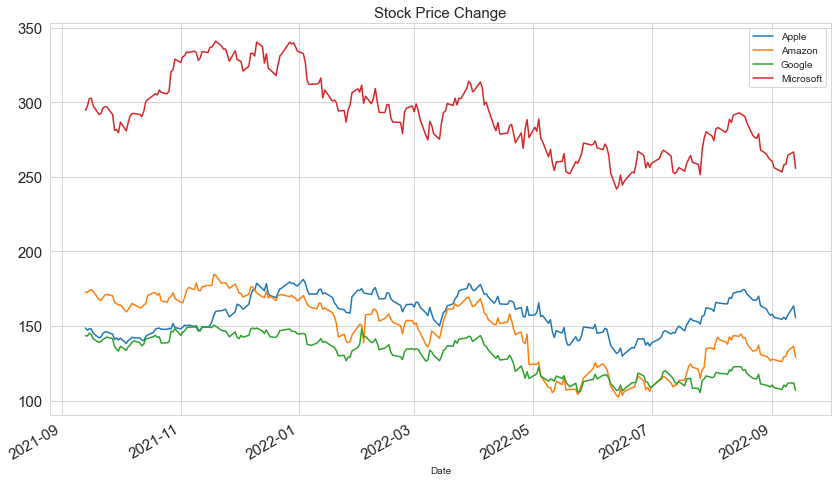

In [15]:
grouped = stocks.groupby('Company')
fig,ax = plt.subplots()

for comp in Companies :
    stock = grouped.get_group(comp)
    stock['Adj Close'].plot(legend=True,figsize=(14,8), ax=ax)
 
ax.legend(Companies)
#ax.tick_params(colors='white')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Stock Price Change",fontsize=15)

#### Change in Stock's Volume to be traded over time

Text(0.5, 1.0, 'AMAZON')

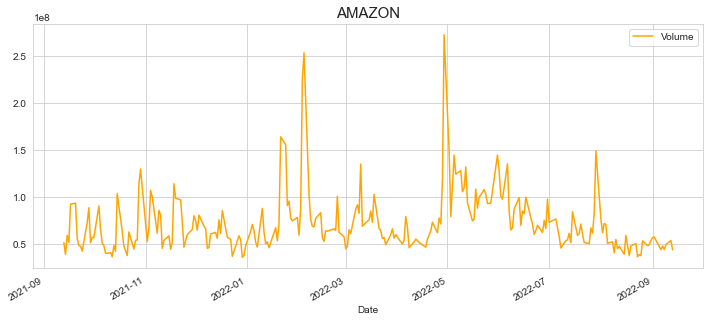

In [16]:
fig,ax = plt.subplots()
AMZN['Volume'].plot(legend=True,figsize=(12,5),color='orange')
plt.title("AMAZON",fontsize=15)
#ax.tick_params(colors='white')

Text(0.5, 1.0, 'GOOGLE')

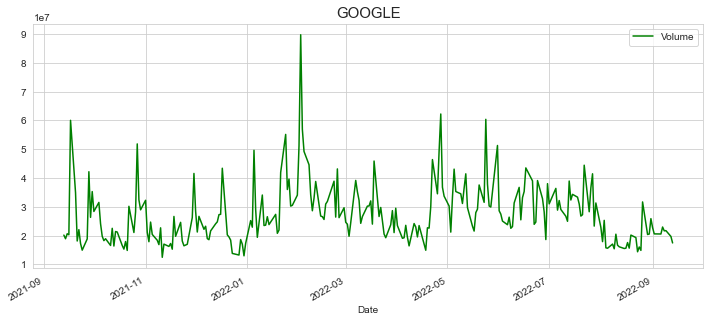

In [17]:
fig,ax = plt.subplots()
GOOG['Volume'].plot(legend=True,figsize=(12,5),color='green')
plt.title("GOOGLE",fontsize=15)
#ax.tick_params(colors='white')

Text(0.5, 1.0, 'APPLE')

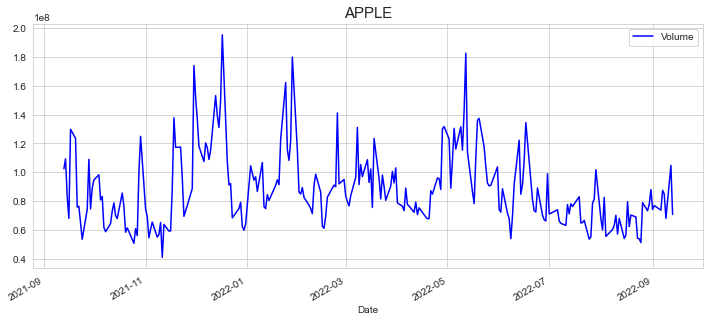

In [18]:
fig,ax = plt.subplots()
AAPL['Volume'].plot(legend=True,figsize=(12,5),color='blue')
plt.title("APPLE",fontsize=15)
#ax.tick_params(colors='white')

Text(0.5, 1.0, 'MICROSOFT')

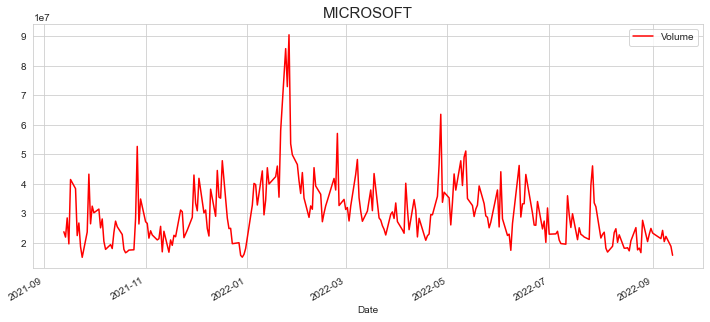

In [19]:
fig,ax = plt.subplots()
MSFT['Volume'].plot(legend=True,figsize=(12,5),color='red')
plt.title("MICROSOFT",fontsize=15)
#ax.tick_params(colors='white')

INFERENCE : Volume of Trade has been declining for all the four Companies recently

### Moving Average of Various Stocks

In [20]:
mov_avg=[20,50,100]

for ma in mov_avg :
    column_name="MA for %s days" %(str(ma))
    
    AMZN[column_name]=AMZN['Adj Close'].rolling(window=ma,center=False).mean()
    GOOG[column_name]=GOOG['Adj Close'].rolling(window=ma,center=False).mean()
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma,center=False).mean()
    MSFT[column_name]=MSFT['Adj Close'].rolling(window=ma,center=False).mean()

In [21]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2022-09-07,129.820007,125.400002,126.120003,129.479996,47900300.0,129.479996,Amazon,135.117499,126.7062,123.466000
2022-09-08,130.279999,127.099998,127.720001,129.820007,43988500.0,129.820007,Amazon,134.473999,127.1546,123.247135
2022-09-09,133.690002,130.759995,130.910004,133.270004,49387600.0,133.270004,Amazon,134.105500,127.6416,123.051985
2022-09-12,136.490005,134.000000,134.100006,136.449997,53748500.0,136.449997,Amazon,133.750499,128.2464,122.835330
2022-09-13,131.399994,128.240005,131.009995,128.960007,43731897.0,128.960007,Amazon,133.039500,128.6344,122.584950


In [22]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2022-09-07,258.829987,253.220001,254.699997,258.089996,24126700.0,258.089996,Microsoft,275.660985,269.572643,268.010114
2022-09-08,260.429993,254.789993,257.510010,258.519989,20319900.0,258.519989,Microsoft,274.159608,269.624308,267.809430
2022-09-09,265.230011,260.290009,260.500000,264.459991,22084700.0,264.459991,Microsoft,273.062006,269.719333,267.661276
2022-09-12,267.450012,265.160004,265.779999,266.649994,18731500.0,266.649994,Microsoft,271.829919,269.926613,267.487435
2022-09-13,260.399994,254.619995,258.839996,255.600006,15687855.0,255.600006,Microsoft,269.967500,269.858010,267.192540


### AMAZON

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

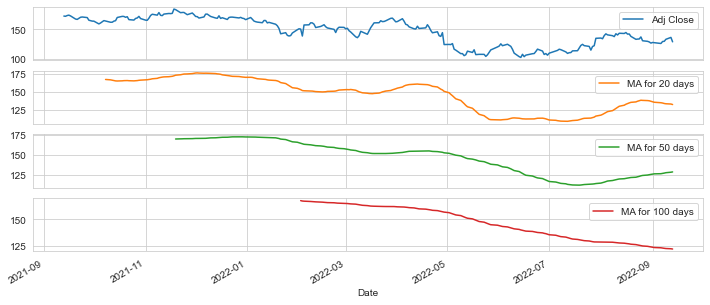

In [23]:
AMZN[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

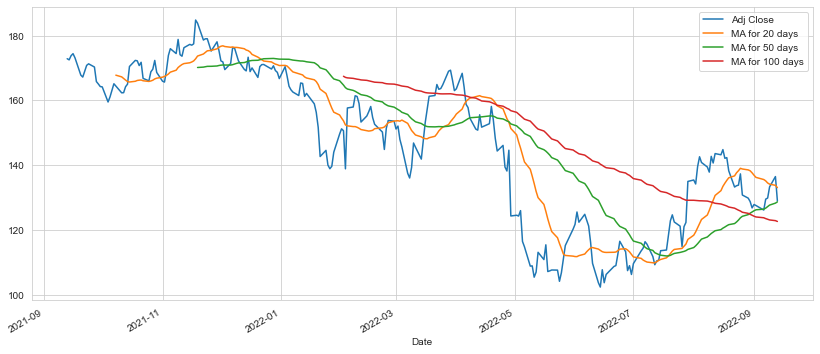

In [24]:
AMZN[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(14,6))

### GOOGLE

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

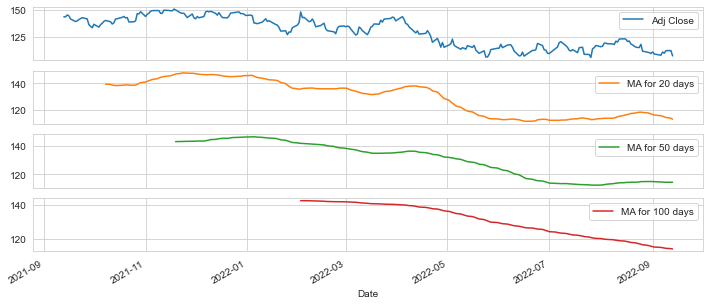

In [25]:
GOOG[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

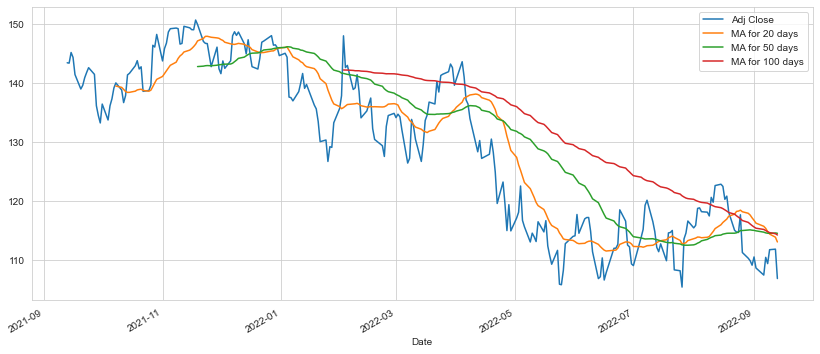

In [26]:
GOOG[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(14,6))

### APPLE

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

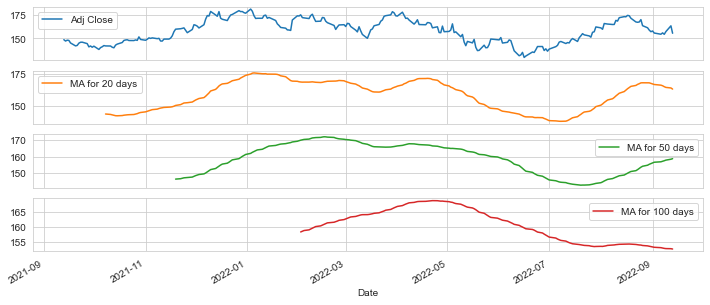

In [27]:
AAPL[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

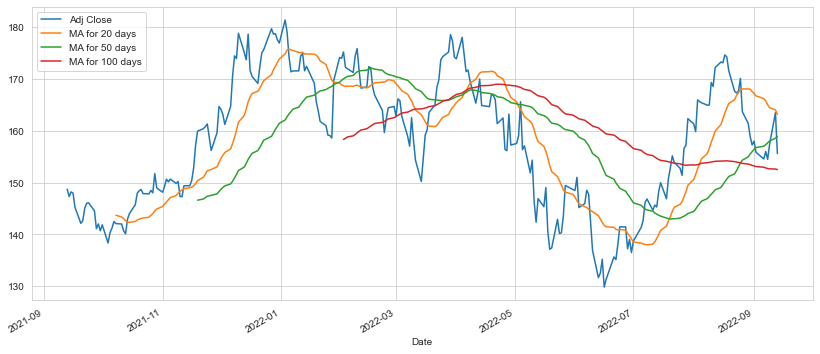

In [28]:
AAPL[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(14,6))

### MICROSOFT

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

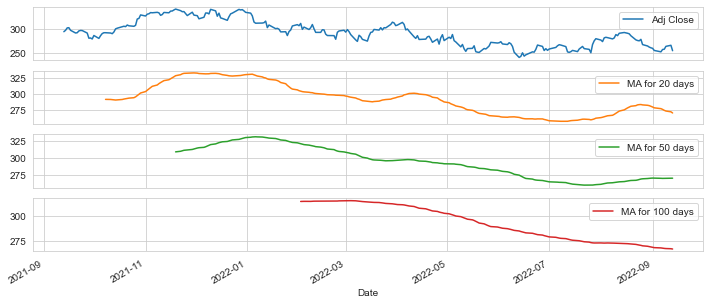

In [29]:
MSFT[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

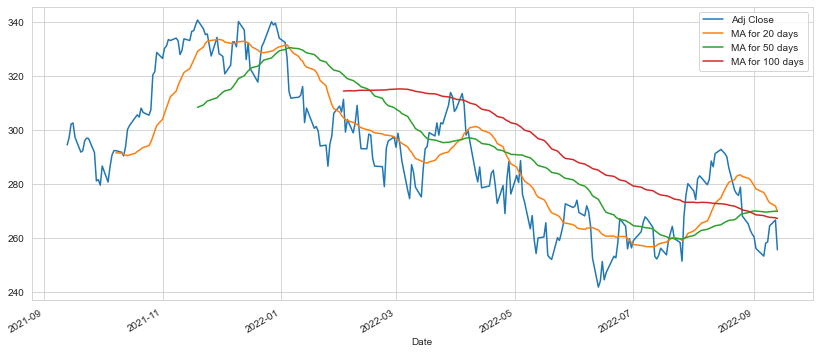

In [30]:
MSFT[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(14,6))

#### INFERENCE : Moving average is smoother for more number of days

### DAILY RETURN AVERAGE

In [31]:
AMZN['Daily Return']=AMZN['Adj Close'].pct_change()
GOOG['Daily Return']=GOOG['Adj Close'].pct_change()
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
MSFT['Daily Return']=MSFT['Adj Close'].pct_change()

In [32]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2022-09-07,258.829987,253.220001,254.699997,258.089996,24126700.0,258.089996,Microsoft,275.660985,269.572643,268.010114,0.019112
2022-09-08,260.429993,254.789993,257.510010,258.519989,20319900.0,258.519989,Microsoft,274.159608,269.624308,267.809430,0.001666
2022-09-09,265.230011,260.290009,260.500000,264.459991,22084700.0,264.459991,Microsoft,273.062006,269.719333,267.661276,0.022977
2022-09-12,267.450012,265.160004,265.779999,266.649994,18731500.0,266.649994,Microsoft,271.829919,269.926613,267.487435,0.008281
2022-09-13,260.399994,254.619995,258.839996,255.600006,15687855.0,255.600006,Microsoft,269.967500,269.858010,267.192540,-0.041440


Text(0.5, 1.0, 'Amazon')

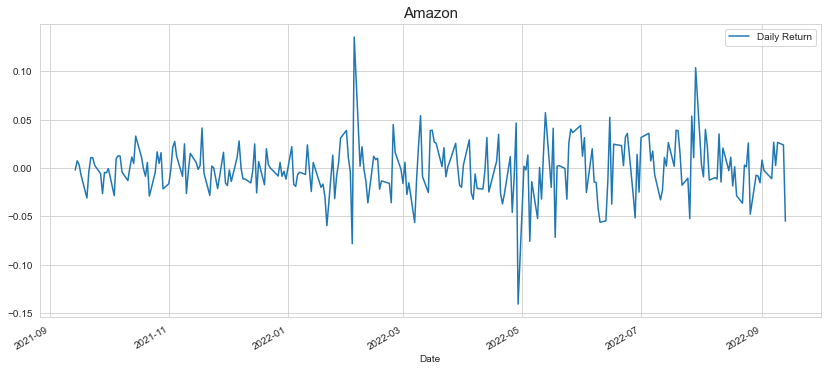

In [33]:
AMZN['Daily Return'].plot(figsize=(14,6),legend=True)
plt.title("Amazon",fontsize=15)

Text(0.5, 1.0, 'Google')

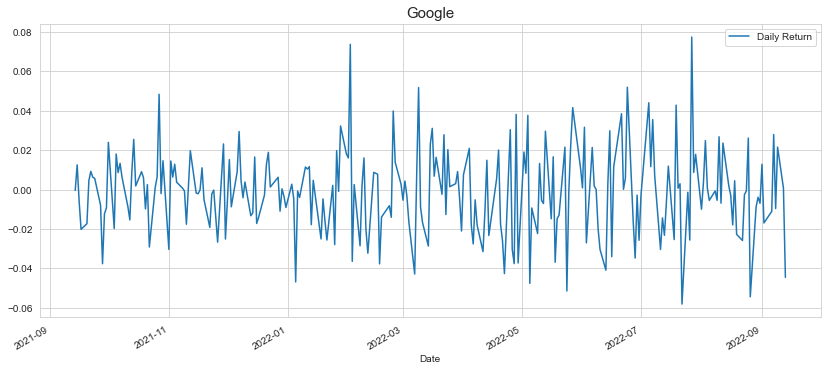

In [34]:
GOOG['Daily Return'].plot(figsize=(14,6),legend=True)
plt.title("Google",fontsize=15)

Text(0.5, 1.0, 'Apple')

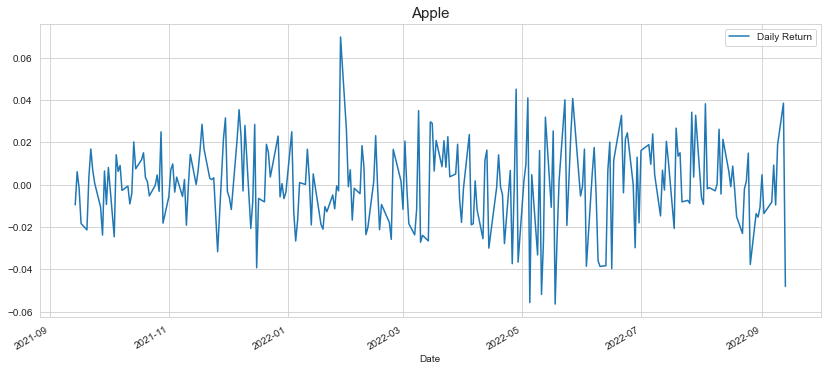

In [35]:
AAPL['Daily Return'].plot(figsize=(14,6),legend=True)
plt.title("Apple",fontsize=15)

Text(0.5, 1.0, 'MicroSoft')

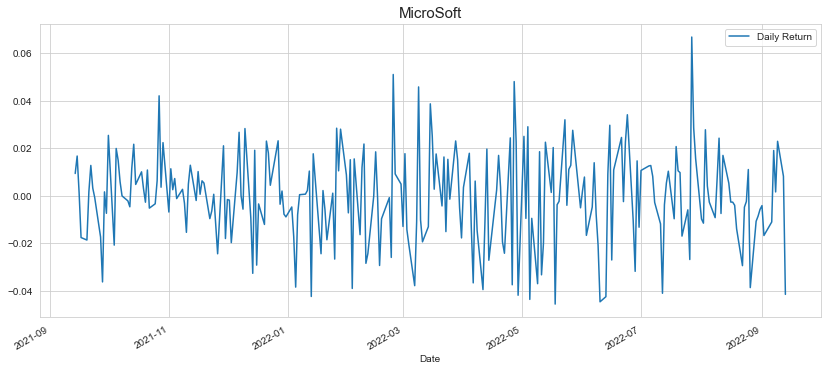

In [36]:
MSFT['Daily Return'].plot(figsize=(14,6),legend=True)
plt.title("MicroSoft",fontsize=15)

#### INFERENCE : During Feb-March all the four stocks shown high positive daily return

  ### Trend 
 

In [37]:
def trend(x):
    if x > -0.015 and x <= 0.015:
        return 'Slight or No change' 
    elif x > 0.015 and x <= 0.04:
        return 'Slight Positive' 
    elif x < -0.015 and x >= -0.04:
        return 'Slight Negative' 
    elif x > 0.04 and x <= 0.06:
        return 'Positive' 
    elif x < -0.04 and x >= -0.06:
        return 'Negative' 
    elif x > 0.06 and x <= 0.07:
        return 'Among top gainers' 
    elif x < -0.06 and x >= -0.07:
        return 'Among top losers' 
    elif x > 0.07:
        return 'Bull run' 
    elif x <= -0.07:
        return 'Bear drop' 


In [38]:
AMZN['Trend']= np.zeros(AMZN['Daily Return'].count()+1) 
AMZN['Trend']= AMZN['Daily Return'].apply(lambda x:trend(x))
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2022-09-07,129.820007,125.400002,126.120003,129.479996,47900300.0,129.479996,Amazon,135.117499,126.7062,123.466000,0.026723,Slight Positive
2022-09-08,130.279999,127.099998,127.720001,129.820007,43988500.0,129.820007,Amazon,134.473999,127.1546,123.247135,0.002626,Slight or No change
2022-09-09,133.690002,130.759995,130.910004,133.270004,49387600.0,133.270004,Amazon,134.105500,127.6416,123.051985,0.026575,Slight Positive
2022-09-12,136.490005,134.000000,134.100006,136.449997,53748500.0,136.449997,Amazon,133.750499,128.2464,122.835330,0.023861,Slight Positive
2022-09-13,131.399994,128.240005,131.009995,128.960007,43731897.0,128.960007,Amazon,133.039500,128.6344,122.584950,-0.054892,Negative


### Visualize Trend Frequncy

Text(0.5, 1.0, 'Trend Frequency of Amazon')

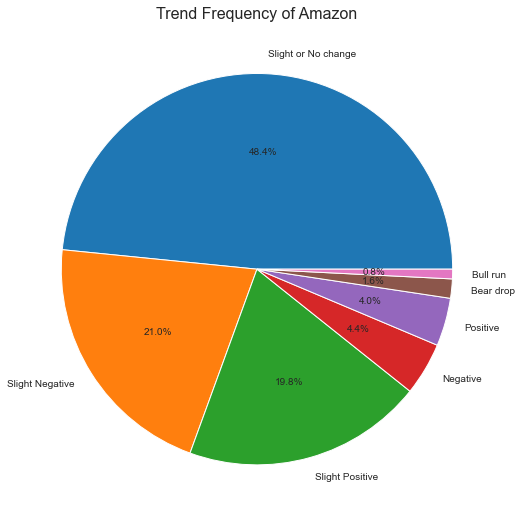

In [39]:
labels = AMZN.Trend.value_counts().index
sizes = AMZN.Trend.value_counts().values
plt.figure(figsize=(9,9))
plt.pie(sizes,labels=labels,autopct="%1.1f%%")
plt.title("Trend Frequency of Amazon",fontsize = 16)

In [40]:
AAPL['Trend']= np.zeros(AAPL['Daily Return'].count()+1) 
AAPL['Trend']= AAPL['Daily Return'].apply(lambda x:trend(x))
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2022-09-07,156.669998,153.610001,154.820007,155.960007,87449600.0,155.960007,Apple,165.701002,157.275759,152.800799,0.009254,Slight or No change
2022-09-08,156.360001,152.679993,154.639999,154.460007,84923800.0,154.460007,Apple,164.962002,157.619972,152.697214,-0.009618,Slight or No change
2022-09-09,157.820007,154.750000,155.470001,157.369995,68028800.0,157.369995,Apple,164.406001,157.986635,152.624922,0.018840,Slight Positive
2022-09-12,164.259995,159.300003,159.589996,163.429993,104806600.0,163.429993,Apple,163.972501,158.524627,152.589996,0.038508,Slight Positive
2022-09-13,160.539993,155.431595,159.899994,155.570007,70784237.0,155.570007,Apple,163.091501,158.861282,152.478166,-0.048094,Negative


Text(0.5, 1.0, 'Trend Frequency of Apple')

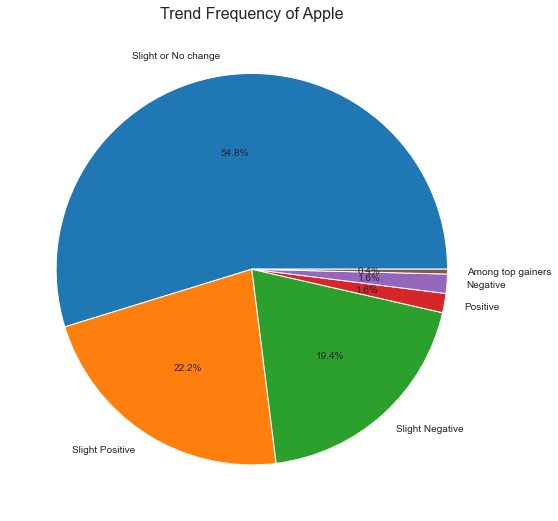

In [41]:
labels = AAPL.Trend.value_counts().index
sizes = AAPL.Trend.value_counts().values
plt.figure(figsize=(9,9))
plt.pie(sizes,labels=labels,autopct="%1.1f%%")
plt.title("Trend Frequency of Apple",fontsize = 16)

#### INFERENCE : For majority of time both stocks have shown 'Slight or No Change',Amazon was among top gainers for 0.8% while Apple for 0.4% only

### Co-relation between Daily return of Stocks

In [42]:
Adj_C = pd.concat([AAPL['Adj Close'],GOOG['Adj Close'],AMZN['Adj Close'],MSFT['Adj Close']], axis =1)
Adj_C.columns=['APPLE','GOOGLE','AMAZON','MICROSOFT']
Adj_C

,APPLE,GOOGLE,AMAZON,MICROSOFT
Date,,,,
2021-09-13,148.716675,143.464996,172.858505,294.523346
2021-09-14,147.294617,143.406006,172.500000,297.300140
2021-09-15,148.199554,145.205994,173.789505,302.288330
2021-09-16,147.960892,144.373505,174.412003,302.684967
2021-09-17,145.246109,141.463501,173.126007,297.379425
...,...,...,...,...
2022-09-07,155.960007,110.480003,129.479996,258.089996
2022-09-08,154.460007,109.419998,129.820007,258.519989
2022-09-09,157.369995,111.779999,133.270004,264.459991


In [43]:
pct_change = Adj_C.pct_change()
pct_change

,APPLE,GOOGLE,AMAZON,MICROSOFT
Date,,,,
2021-09-13,NaN,NaN,NaN,NaN
2021-09-14,-0.009562,-0.000411,-0.002074,0.009428
2021-09-15,0.006144,0.012552,0.007475,0.016778
2021-09-16,-0.001610,-0.005733,0.003582,0.001312
2021-09-17,-0.018348,-0.020156,-0.007373,-0.017528
...,...,...,...,...
2022-09-07,0.009254,0.027912,0.026723,0.019112
2022-09-08,-0.009618,-0.009595,0.002626,0.001666
2022-09-09,0.018840,0.021568,0.026575,0.022977


<AxesSubplot:>

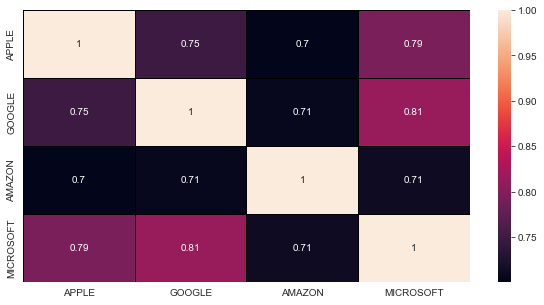

In [44]:
fig,ax= plt.subplots(figsize=(10,5))
sns.heatmap(pct_change.corr(),annot=True,linecolor='black',linewidth=0.5,ax=ax)

#### INFERENCE : Among following Microsoft and Google have highest Correaltion and all the four companies are positively Correlated